In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/BostonHousing.csv")

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [14]:
X = df.drop("medv", axis=1)
y = df["medv"]

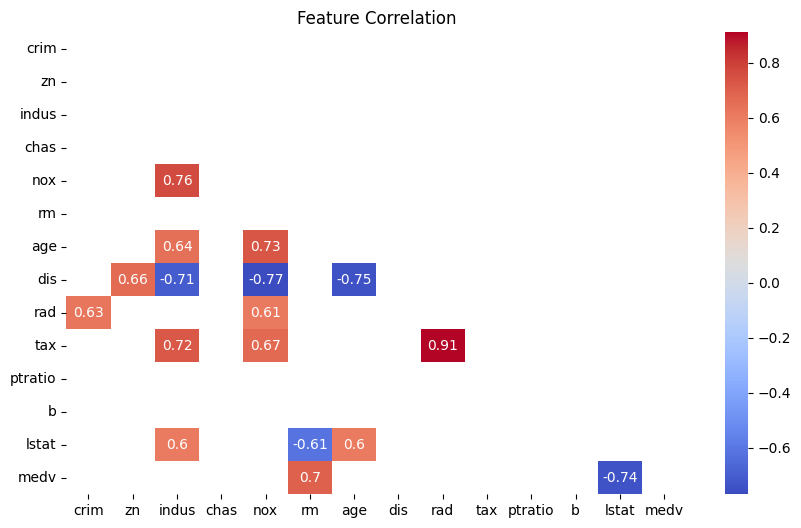

In [15]:
corr = df.corr()
threshold = 0.6
mask_low_corr = np.abs(corr) < threshold
mask_high_corr = np.triu(np.ones_like(corr, dtype=bool)) 
combined_mask = mask_low_corr | mask_high_corr

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask = combined_mask, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [18]:
y_pred = gbr.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 6.208861361528038
RMSE: 2.491758688462436
R-squared: 0.9153342280466539


In [24]:
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.9800300447996301
0.9153342280466539


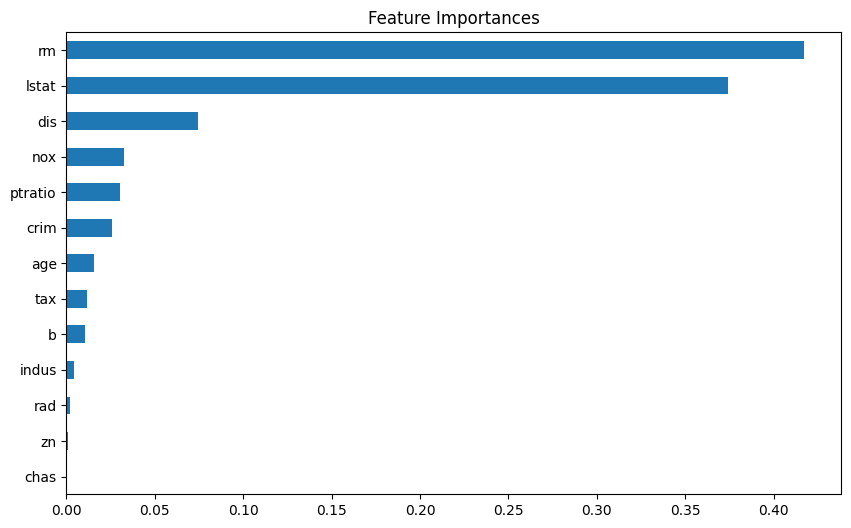

In [20]:
# Step 6: Feature Importance
plt.figure(figsize=(10,6))
feat_imp = pd.Series(gbr.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [21]:
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [22]:
sample = pd.DataFrame([{
	'crim': 0.00632,
	'zn': 18.0,
	'indus': 2.31,
	'chas': 0,
	'nox': 0.538,
	'rm': 6.575,
	'age': 65.2,
	'dis': 4.0900,
	'rad': 1,
	'tax': 296,
	'ptratio': 15.3,
	'b': 396.90,
	'lstat': 4.98
},{
	'crim': 0.02731,
	'zn': 0.0,
	'indus': 7.07,
	'chas': 0,
	'nox': 0.469,
	'rm': 6.421,
	'age': 78.9,
	'dis': 4.9671,
	'rad': 2,
	'tax': 242,
	'ptratio': 17.8,
	'b': 396.90,
	'lstat': 9.14
}])

In [23]:
pred = gbr.predict(sample)
print(pred)

[28.08800612 21.25027111]
